In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
faulty_df_1 = pd.read_csv('data/ImbalanceMotorON_1.csv')
faulty_mic_data_1 = faulty_df_1['Volt0']
normal_df_1 = pd.read_csv('data/NormalMotorON_1.csv')
normal_mic_data_1 = normal_df_1['Volt0']

In [4]:
sr = 30000

def get_fft(mic_data, sr):
    window = np.kaiser(len(mic_data), 10)
    mic_data = np.multiply(mic_data, window)
    mic_fft = np.fft.rfft(mic_data)
    mic_freq = np.fft.rfftfreq(len(mic_data), 1/sr)
    return mic_fft, mic_freq

In [5]:
faulty_fft, faulty_freq = get_fft(faulty_mic_data_1, sr)
normal_fft, normal_freq = get_fft(normal_mic_data_1, sr)
faulty_amplitude = np.abs(faulty_fft)
normal_amplitude = np.abs(normal_fft)

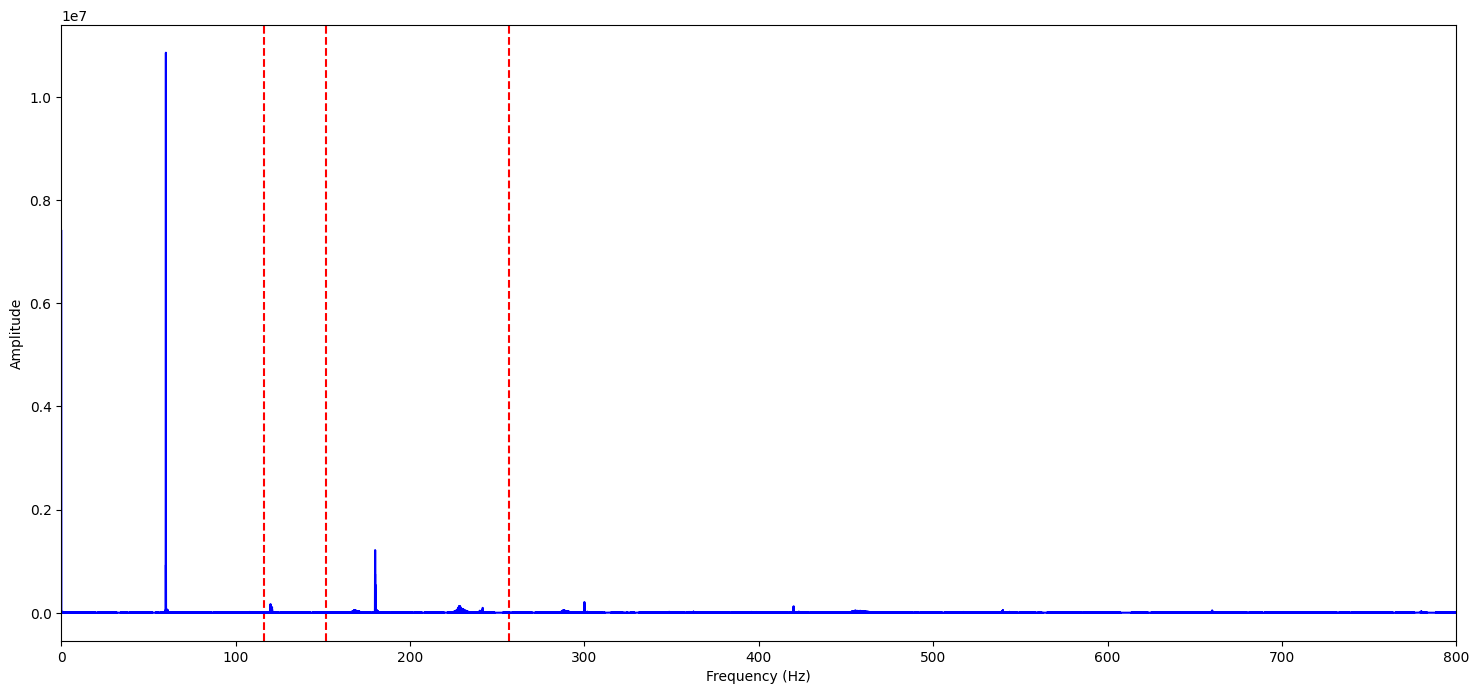

In [16]:
plt.figure(figsize=(18, 8))
plt.axvline(116, color='r', linestyle='--')
plt.axvline(257, color='r', linestyle='--')
plt.axvline(152, color='r', linestyle='--')
plt.plot(normal_freq, normal_amplitude, color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 800)
#plt.ylim(0, 0.5e6)
plt.show()

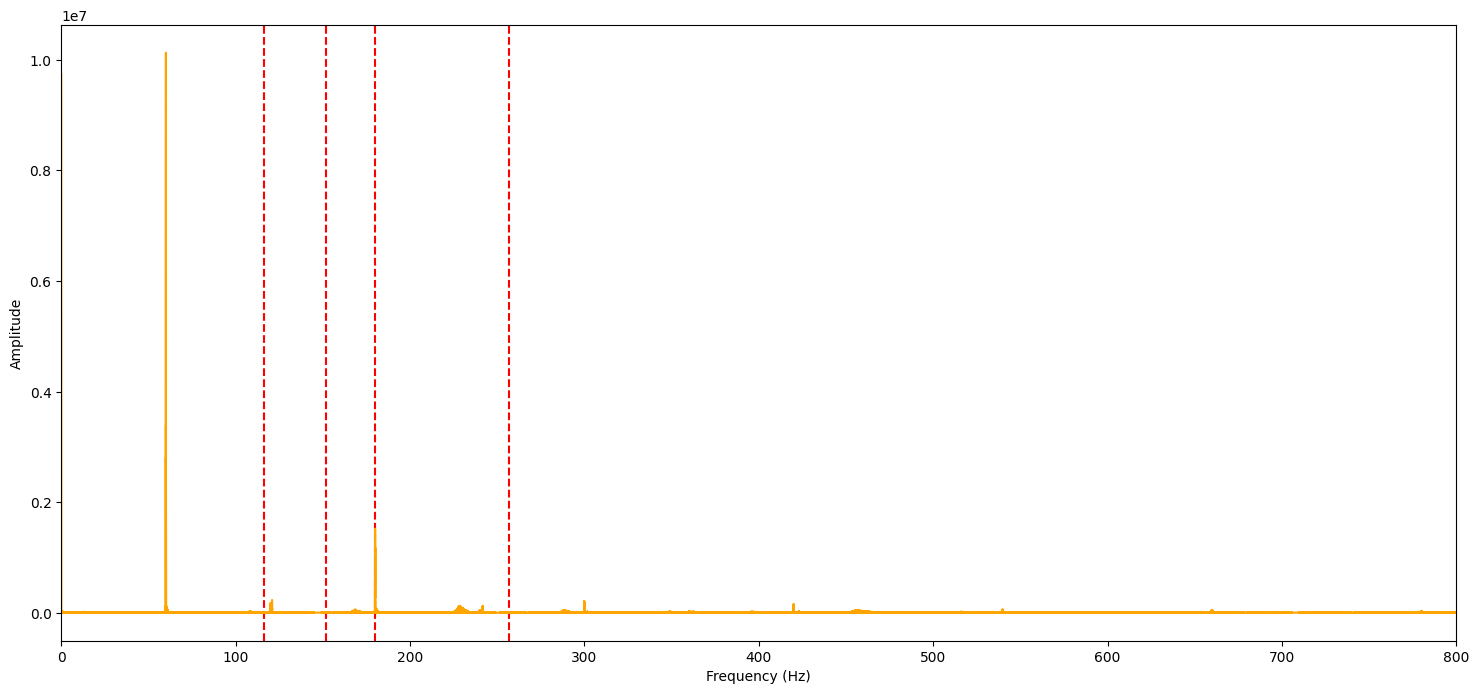

In [18]:
plt.figure(figsize=(18, 8))
plt.axvline(116, color='r', linestyle='--')
plt.axvline(257, color='r', linestyle='--')
plt.axvline(152, color='r', linestyle='--')
plt.axvline(180, color='r', linestyle='--')

plt.plot(faulty_freq, faulty_amplitude, color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 800)
#plt.ylim(0, 0.5e6)
plt.show()